<a href="https://colab.research.google.com/github/Plashka320/Stat_prack_HW_VyuzhaninPD_2025/blob/main/Itogovaya_pabota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#Датасет: New York City Airbnb Open Data (аренда жилья в Нью-Йорке )
[Сам датасет](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?select=New_York_City_.png)

###Цели:


*   Определение факторов, влияющих на стоимость аренды (например, местоположение, тип жилья, доступность удобств)
*    Исследование распределения предложений аренды по районам Нью-Йорка.
*    Выявление наиболее востребованных типов жилья или районов среди арендаторов.
*   Подготовка данных для создания модели прогнозирования цен на аренду.(Как будет вести себя цены в зависимости от района, цены, площади и тд)

В идеале я хочу сделать модель которая по заданным параметрам будет мне выдавать "справедливую цену" на жилье. Например так же как это сделоно на Циан. там есть "Оценка циан" она показывает насколько выше или нирже рынка прожавец уцстановил цену.

###Основные сложности:

*



In [15]:
import pandas as pd

data = pd.read_csv("/content/AB_NYC_2019.csv")

print(data.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [17]:
print(data.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [18]:
print(data.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [20]:
'''
Параметр subset=['name'] указывает, что проверять нужно только столбец name.
Параметр inplace=True означает, что изменения будут применены к самому DataFrame
(вместо создания нового).
'''
data.dropna(subset = ['name'], inplace = True)
data['host_name'] = data['host_name'].fillna("Unknown")
data['last_review'] = data['last_review'].fillna("No reviews")
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

print(data.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [21]:
numeric_data = data.select_dtypes(include = ['int64', 'float64'])

correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                                      id   host_id  latitude  longitude  \
id                              1.000000  0.588265 -0.003053   0.090849   
host_id                         0.588265  1.000000  0.020236   0.127025   
latitude                       -0.003053  0.020236  1.000000   0.084758   
longitude                       0.090849  0.127025  0.084758   1.000000   
price                           0.010638  0.015321  0.033940  -0.149976   
minimum_nights                 -0.012015 -0.017036  0.025826  -0.062899   
number_of_reviews              -0.319974 -0.140172 -0.015348   0.059099   
reviews_per_month               0.180063  0.209724 -0.018705   0.138523   
calculated_host_listings_count  0.133241  0.154934  0.019532  -0.114729   
availability_365                0.085480  0.203529 -0.010975   0.082735   

                                   price  minimum_nights  number_of_reviews  \
id                              0.010638       -0.012015          -0.319974   
host_id         

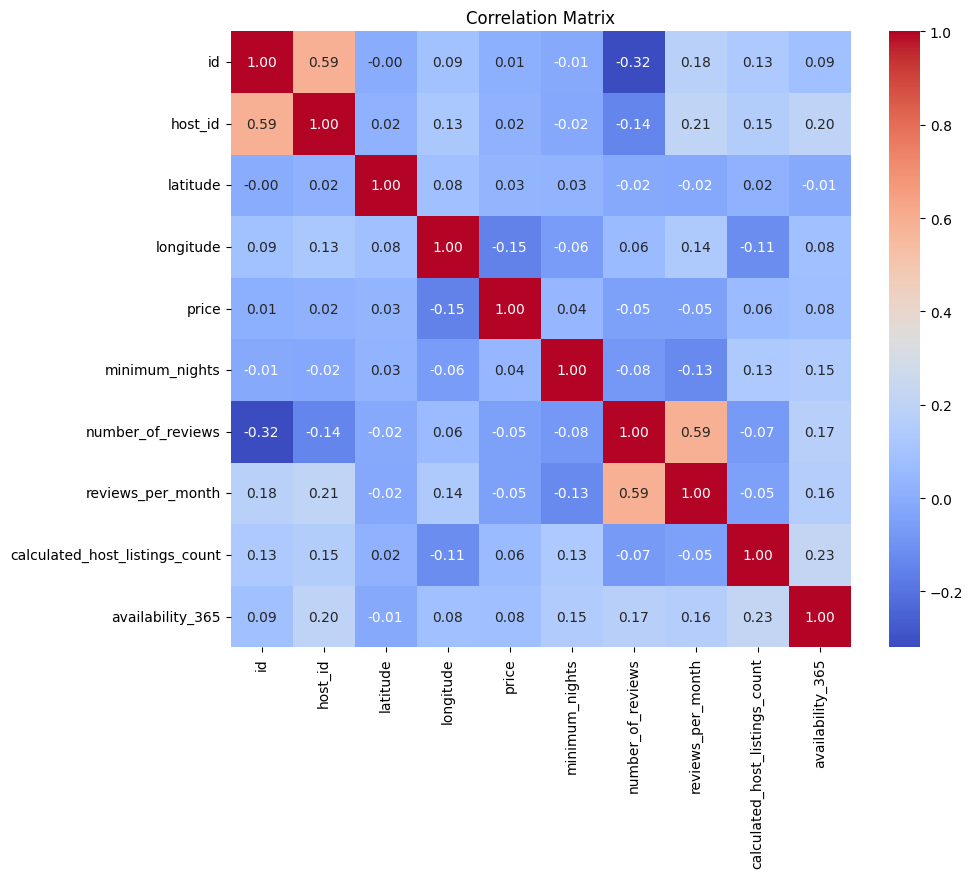

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Большинство переменных имеют слабые или очень слабые корреляции. Это может указывать на то, что зависимости между переменными либо нет, либо они нелинейны, либо тут важны факторы которые мы не учитываем

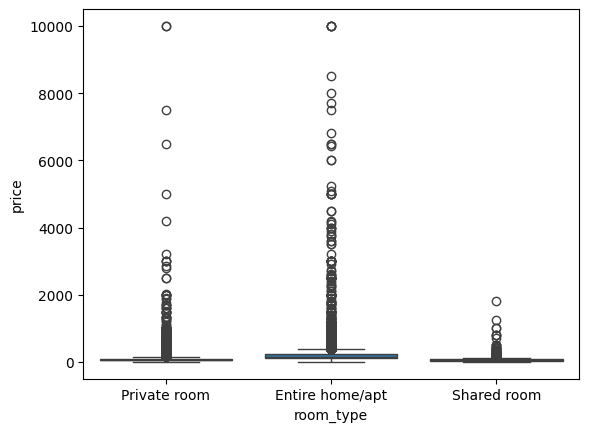

In [25]:
sns.boxplot(x='room_type', y='price', data=data)
plt.show()

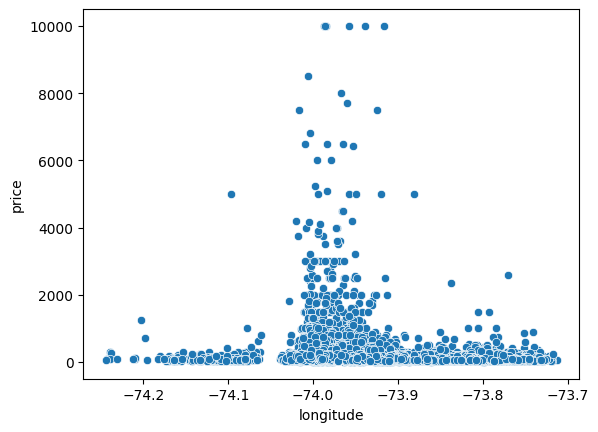

In [26]:
sns.scatterplot(x='longitude', y='price', data=data)
plt.show()

In [27]:
print(data.groupby('neighbourhood_group')['price'].mean())

neighbourhood_group
Bronx             87.457798
Brooklyn         124.395711
Manhattan        196.877425
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


In [28]:
print(data.groupby('room_type')['price'].mean())

room_type
Entire home/apt    211.788048
Private room        89.786630
Shared room         70.075928
Name: price, dtype: float64


Подготовка данных для МЛ

In [30]:
# Удаляем столбец 'reviews_per_month', так как он сильно коррелирует с 'number_of_reviews'
data.drop(columns=['reviews_per_month'], inplace=True)


KeyError: "['reviews_per_month'] not found in axis"

In [31]:
#  Исключение нерелевантных переменных
data.drop(columns=['id', 'host_id', 'last_review'], inplace=True)